Run complete


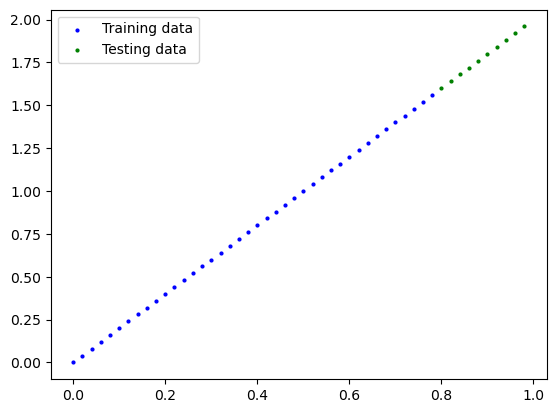

In [36]:
import torch
from torch import nn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#creating a linear regresson with know weights and biases
weight = 2
bias = 0

start = 0
end = 1
step = 0.02

#create list of inputs and ouputs

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
#print (X[:10],y[:10],len(X),len(y))

#Splitting data into training and test set
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split],y[:train_split]
X_test, y_test = X[train_split:],y[train_split:]

def plot_predictions (train_data = X_train, 
               train_labels = y_train,
               test_data=X_test, 
               test_labels = y_test,
               predictions = None):
    plt.scatter(train_data,train_labels,c='b',s=4,label = "Training data")
    plt.scatter(test_data,test_labels,c='g',s=4,label = "Testing data")
    
    if predictions is not None:
        
        plt.scatter(test_data,predictions,c='r',s=4,label = "Predictions")
        
    #show the legend
    plt.legend()
        
plot_predictions()

print("Run complete")


In [37]:
##building a model 
#create a linear regression model class 
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight=nn.Parameter(torch.randn(1,
                                              requires_grad=True,
                                              dtype = torch.float))
        self.bias=nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype = torch.float))
    #forward method to define the computations in the model 
    def forward(self,x:torch.Tensor)->torch.Tensor:
        return self.weight * x + self.bias # this is the linear regression model 
        

In [17]:
#check the contents of the model 
#create a random seed 
torch.manual_seed(42)
#create an instance of the model (this is a subclass of nn.module)

model_0 = LinearRegressionModel()
#printing of the list 
list(model_0.parameters())
print(model_0.state_dict())



OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])


In [19]:
#making prediction using 'torch.inference_model()'
with torch.inference_mode():
    y_preds=model_0(X_test)
y_preds


tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

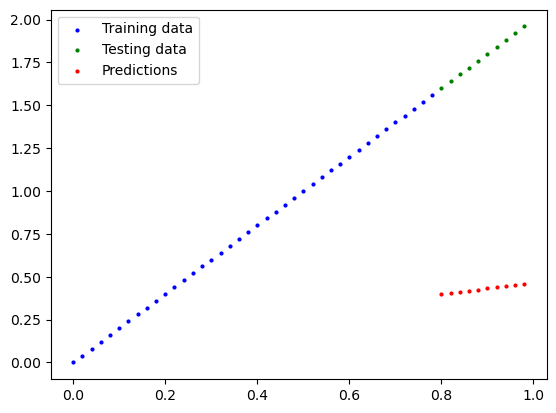

In [13]:
plot_predictions(predictions = y_preds)

#ideally the red dots are ontop of the green dots 


In [14]:
#train the model, 

#the whole idea is to move the red dots to the green, unknown pararemeters to known parameters
#loss function 
#optomizer 


# setting up a loss function 
loss_fn=nn.L1Loss()

# setting up a optomizer 
optomizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01) #lr = learning rate

In [34]:
#building the training loop and a testing loop 
#0. loop through the data 
#1. Forward pass (this involves data moving through our model's forward function 
#2. Calculate the loss  compare productions to ground thruth labels 
#3. loss backward - move backwards throguh the network to calcuate the gradients of each of the parameters of our model with respoec to the loss
#4. use the optimizer to adjust our models parameters to tru and improce the loss 


#an epoch is one loop through the data 
######TRAINING LOOP ##########################
epochs = 1000
epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    model_0.train() 
    # 1 forward pass 
    y_preds = model_0(X_train)
    # 2 calculate the loss 
    loss = loss_fn(y_preds,y_train)
    # 3 optomizer zero grad 
    optomizer.zero_grad()
    # 4 perfrom back propogation on the loss with respect to the parameters of the model 
    loss.backward()
    # 5. step the optimizer (perform gradeint descent )
    optomizer.step() # by deful how the optimzer changes will acculumate through the loop so we have to zero them above in step 3
    
    #TESTING
    model_0.eval() #tunrs off diffrence setting sin th emodel not needed evaluating/testing
    with torch.inference_mode():
        # 1. forward 
        test_pred = model_0(X_test)
        #2. lest 
        test_loss = loss_fn(test_pred,y_test)
        
    if epoch%10==0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | Test: {loss} | Test loss: {test_loss}")
    
    
    print(f"Loss:{loss}" )
    print(model_0.state_dict())
    

Epoch: 0 | Test: 0.535663366317749 | Test loss: 1.3515361547470093
Loss:0.535663366317749
OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])
Loss:0.535663366317749
OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])
Loss:0.535663366317749
OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])
Loss:0.535663366317749
OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])
Loss:0.535663366317749
OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])
Loss:0.535663366317749
OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])
Loss:0.535663366317749
OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])
Loss:0.535663366317749
OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])
Loss:0.535663366317749
OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])
Loss:0.535663366317749
OrderedDict([('weight', tensor([0.3367])), ('bias', ten

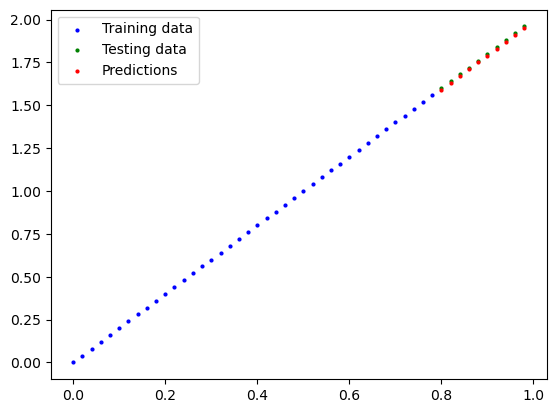

In [1391]:
with torch.inference_mode():
    ypreds_new=model_0(X_test)
    plot_predictions (predictions = ypreds_new)

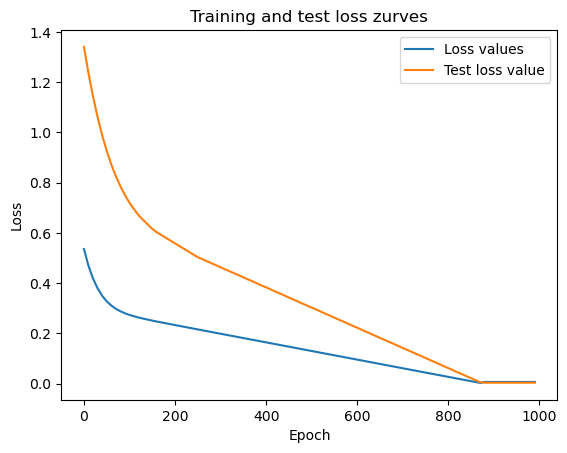

In [1346]:
#plotting the loss curves 
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Loss values ")
plt.plot(epoch_count,test_loss_values, label="Test loss value")
plt.title("Training and test loss zurves")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

        
        

In [1358]:
#saving a model in pytorch
from pathlib    import Path 
# create models directory 
MODEL_PATH = Path("Models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#create model save path 
MODEL_NAME= "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME
print(f"Saving model to : {MODEL_SAVE_PATH}") 

#3. SAVE THE MODEL SAVE DICT 
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

## Loading the model of just the state dict 
#new instance of the linear regression model class 
loaded_model_0 = LinearRegressionModel()
#load the saved state_dict of model_0 into the new instance 
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))

print(loaded_model_0.state_dict())



#now make some predictions iwht our loaded model 
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)
    print(loaded_model_preds)

Saving model to : Models/01_pytorch_workflow_model_0.pth
OrderedDict([('weight', tensor([1.9928])), ('bias', tensor([-0.0037]))])
tensor([[1.5905],
        [1.6304],
        [1.6703],
        [1.7101],
        [1.7500],
        [1.7898],
        [1.8297],
        [1.8695],
        [1.9094],
        [1.9493]])


In [1362]:
 #compared loaded model preds wiht origianl 
model_0.eval()
with  torch.inference_mode():
    y_preds = model_0(X_test)
    
print(y_preds==loaded_model_preds)

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])


In [1364]:




## Putting it all togherter 

import torch 
from torch import nn
import matplotlib.pyplot as plt

print(torch.__version__)

2.2.2


In [33]:
#Data 
weight = 0.7 
bias = 0.3

#create range values 
start = 0 
end = 1
step = 0.02

#create X and Y (feautres and lables)
X = torch.arange(start,end,step).unsqueeze(dim=1)
Y = weight*X + bias 
print(X[:10], Y[:10])



tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]]) tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])


torch.Size([50, 1])

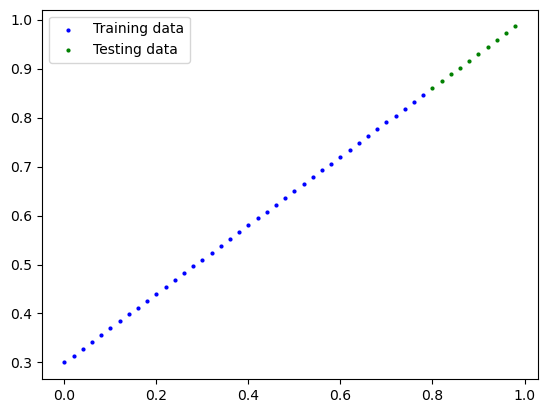

In [1473]:
#Splitting the data into training and test 
train_spilt = int(0.8*len(X))
X_train = X[:train_spilt]
Y_train = Y[:train_spilt]
X_test = X[train_spilt:]
Y_test = Y[train_spilt:]
plot_predictions(X_train,Y_train,X_test,Y_test)


In [6]:
#Buliding a pytorch linear model 
# Subclass nn.Module to make our model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1,out_features=1)
    
    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed when creating the model (this isn't always need but is used for demonstrative purposes, try commenting it out and seeing what happens)
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
print(model_1, model_1.state_dict())

NameError: name 'nn' is not defined

In [7]:
# Create loss function
loss_fn = nn.L1Loss()

# Create optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), # optimize newly created model's parameters
                            lr=0.01)


torch.manual_seed(42)

# Set the number of epochs 
epochs = 10000 


for epoch in range(epochs):
    ### Training
    model_1.train() # train mode is on by default after construction

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Testing
    model_1.eval() # put the model in evaluation mode for testing (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model_1(X_test)
    
        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")
with torch.inference_mode():
    ypreds_new = model_1(X_test)
    plot_predictions(predictions=ypreds_new)

NameError: name 'nn' is not defined

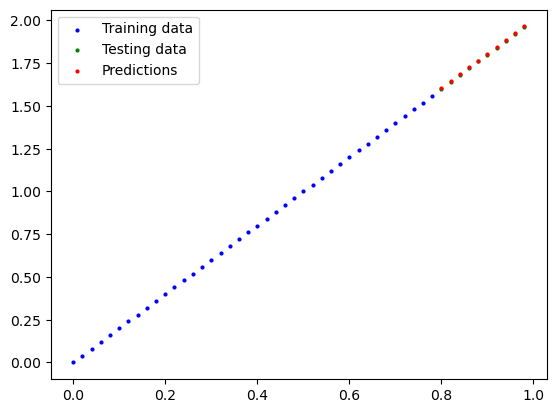

In [1482]:

with torch.inference_mode():
    ypreds_new = model_1(X_test)
    plot_predictions(predictions=ypreds_new)

In [24]:
y_preds = model_0(X_train)
y_preds.shape

torch.Size([40, 1])

In [28]:
#loss = loss_fn(y_preds,y_train)
#loss
y_train

tensor([[0.0000],
        [0.0400],
        [0.0800],
        [0.1200],
        [0.1600],
        [0.2000],
        [0.2400],
        [0.2800],
        [0.3200],
        [0.3600],
        [0.4000],
        [0.4400],
        [0.4800],
        [0.5200],
        [0.5600],
        [0.6000],
        [0.6400],
        [0.6800],
        [0.7200],
        [0.7600],
        [0.8000],
        [0.8400],
        [0.8800],
        [0.9200],
        [0.9600],
        [1.0000],
        [1.0400],
        [1.0800],
        [1.1200],
        [1.1600],
        [1.2000],
        [1.2400],
        [1.2800],
        [1.3200],
        [1.3600],
        [1.4000],
        [1.4400],
        [1.4800],
        [1.5200],
        [1.5600]])

In [35]:
loss

tensor(0.5357, grad_fn=<MeanBackward0>)